<a href="https://colab.research.google.com/github/rumanus-egu/Linear-Regression-Project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Please use the Seoul Bike dataset.**

Loading of Libraries

In [64]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

Data Acquisiton

In [65]:
S_bike= pd.read_csv("/content/SeoulBikeData.csv")
data = pd.concat([S_bike],ignore_index = True)

In [66]:
#printing dimension of dataset
print("Dimension of S_bike dataset", S_bike.shape)

Dimension of S_bike dataset (8760, 14)


In [67]:
# showing over view of the S_bike dataset
S_bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [68]:
# showing datatypes of the columns
S_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [69]:
# getting discriptive statistics on "number" datatypes
S_bike.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Factors influencing the number of Wind Speed**

In [70]:
S_bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Missing values**

In [71]:
# Identifying missing values
miss_val = S_bike.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

**There are no missing values**

In [72]:
# Identifing missing Values > 0 and sorting them by ascending order
#miss_val[miss_val>0].sort_values(ascending = False)

**Outlier Analysis**

In [73]:
S_bike['Rented Bike Count'].value_counts(bins=10)

(-3.557, 355.6]     3648
(355.6, 711.2]      1619
(711.2, 1066.8]     1310
(1066.8, 1422.4]     910
(1422.4, 1778.0]     514
(1778.0, 2133.6]     406
(2133.6, 2489.2]     250
(2489.2, 2844.8]      61
(2844.8, 3200.4]      26
(3200.4, 3556.0]      16
Name: Rented Bike Count, dtype: int64

In [74]:
S_bike['Rented Bike Count'].median()

504.5

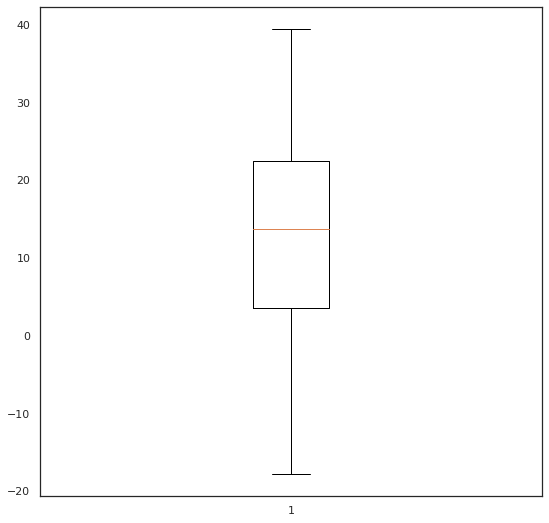

In [75]:
plt.figure(figsize=(9,9))
plt.boxplot(S_bike['Temperature(C)'])
plt.show()

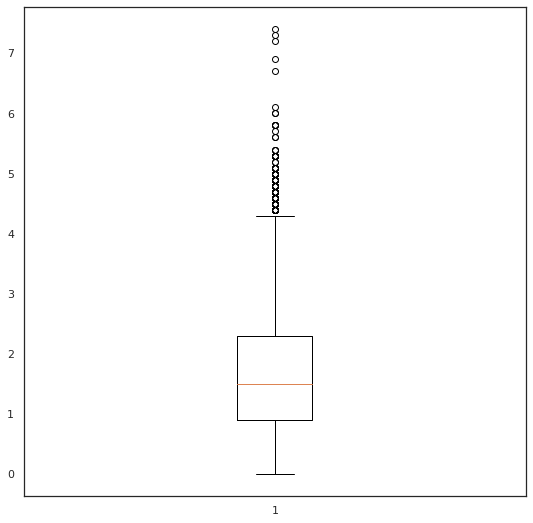

In [76]:
plt.figure(figsize=(9,9))
plt.boxplot(S_bike['Wind speed (m/s)'])
plt.show()

In [77]:
Q1 = np.percentile(S_bike['Wind speed (m/s)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(S_bike['Wind speed (m/s)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(S_bike['Wind speed (m/s)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [102]:
Bikes = S_bike[S_bike['Wind speed (m/s)']< up_lim]
Bikes = Bikes[Bikes['Wind speed (m/s)']> low_lim]


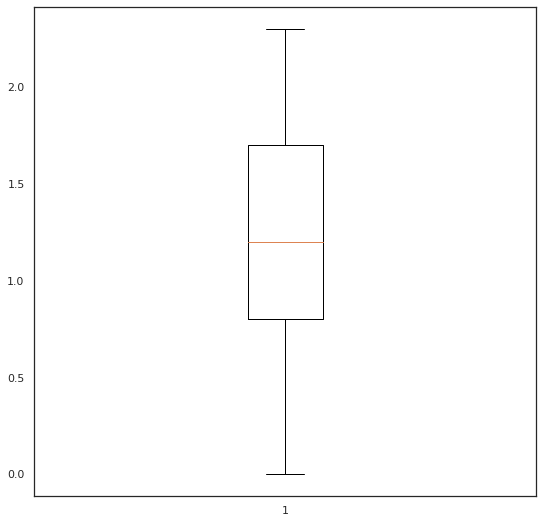

In [103]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Wind speed (m/s)'])
plt.show()

In [80]:
print("New Shape", df_S_bike.shape)

New Shape (8760, 10)


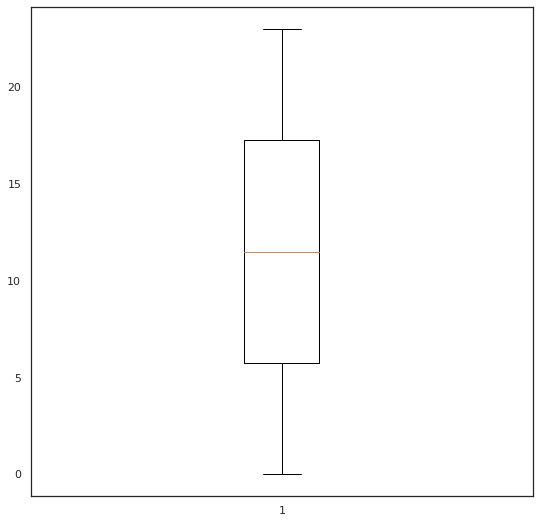

In [81]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Hour'])
plt.show()

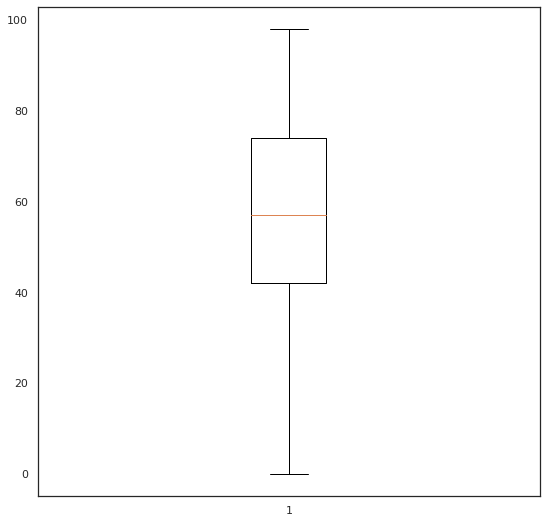

In [82]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Humidity(%)'])
plt.show()

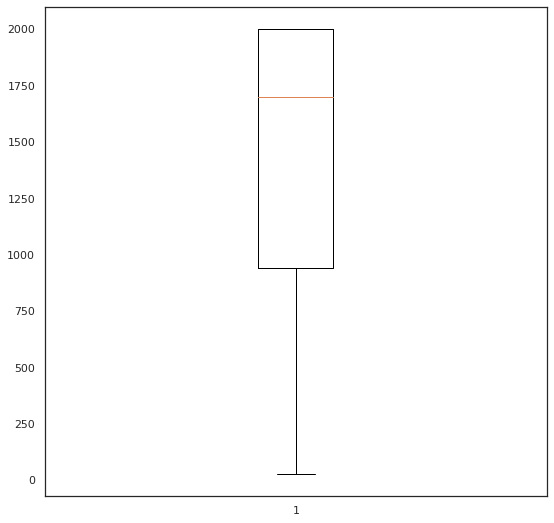

In [83]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Visibility (10m)'])
plt.show()

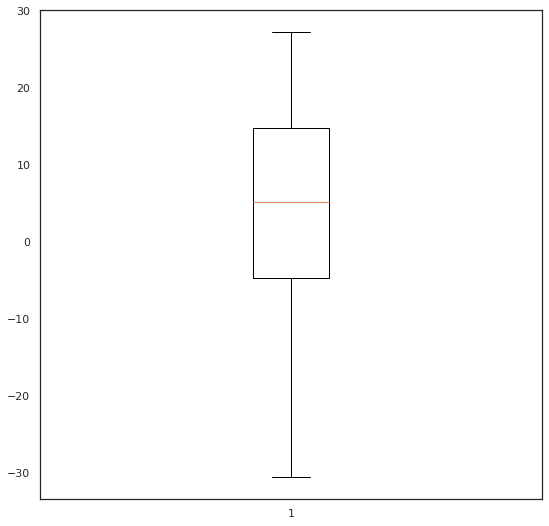

In [84]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Dew point temperature(C)'])
plt.show()

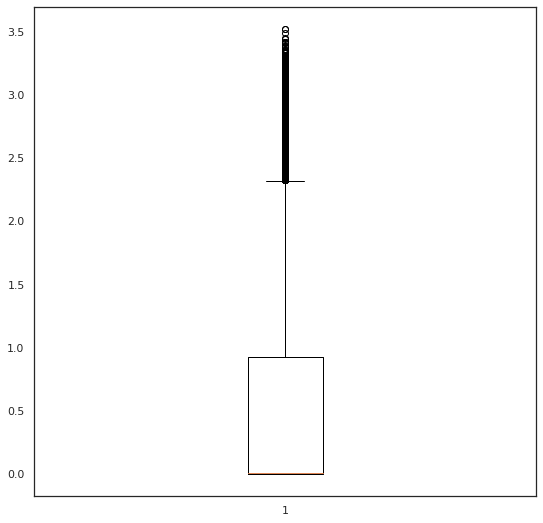

In [85]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes['Solar Radiation (MJ/m2)'])
plt.show()

In [86]:
Q1 = np.percentile(S_bike['Solar Radiation (MJ/m2)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(S_bike['Solar Radiation (MJ/m2)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(S_bike['Solar Radiation (MJ/m2)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.395
upper limit: 2.325


In [87]:
Bikes=S_bike[S_bike['Solar Radiation (MJ/m2)']< up_lim]
Bikes=S_bike[S_bike['Solar Radiation (MJ/m2)']> low_lim]

In [88]:
# Extracting dataframe for only 'number' datatypes
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [89]:
df_S_bike = df[:8760]

In [90]:
#Constructing correlation Matrix
data_corr = df_S_bike.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [91]:
data_corr_RBC = data_corr['Rented Bike Count'][1:]
data_corr_RBC[abs(data_corr_RBC)>=0.20].sort_values(ascending=False)

Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Name: Rented Bike Count, dtype: float64

In [92]:
#sns.heatmap

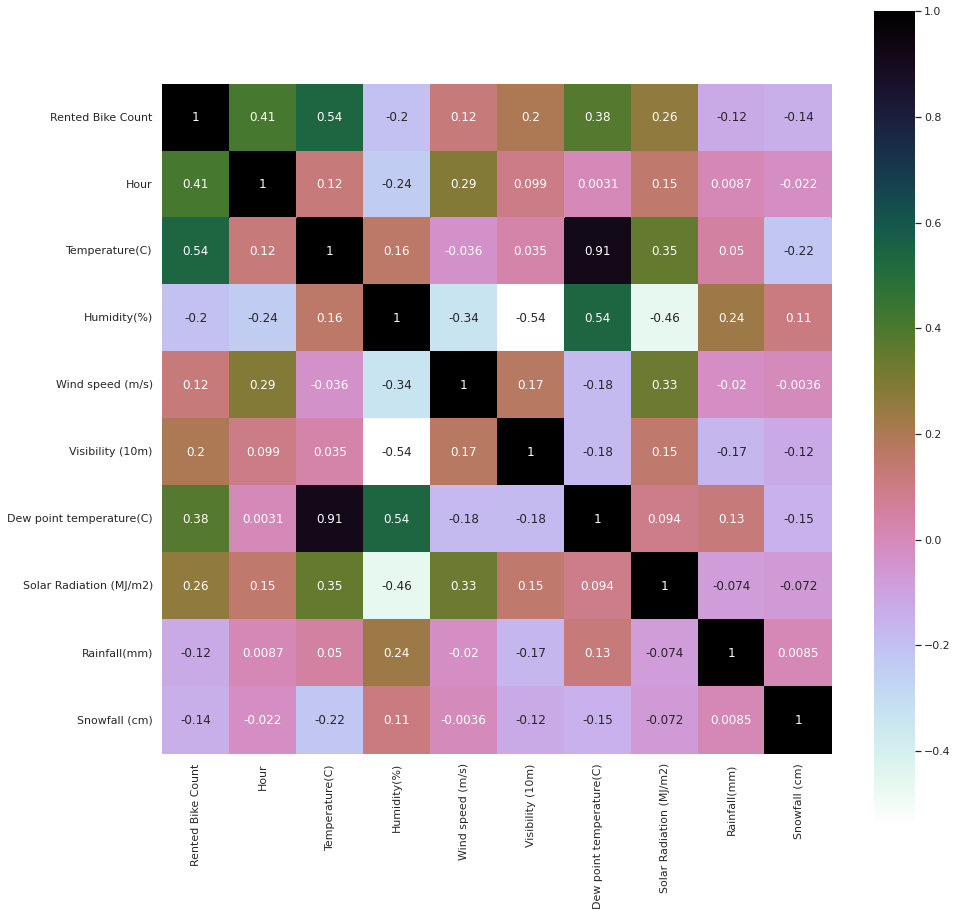

In [93]:
corr = df_S_bike.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']

In [106]:
# split dataset into training and testing data
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [108]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(7008, 9)
(1752, 9)
(7008,)
(1752,)


In [ ]:
# define model

In [111]:
from sklearn.linear_model import LinearRegression 

model =LinearRegression()
model.fit(train_x,train_y) # train our model

LinearRegression()

In [ ]:
# test our model

In [112]:
from sklearn.metrics import mean_squared_error,r2_score
model_pred = model.predict(test_x)
model_score = model.score(test_x,test_y)

In [113]:
print("Accuracy: ", model.score(test_x,test_y))
print("Mean Squared Error: " ,mean_squared_error(model_pred,test_y))
print("R-squared score: ", r2_score(test_y,model_pred))

Accuracy:  0.4720515274759439
Mean Squared Error:  218458.93714591715
R-squared score:  0.4720515274759439


In [ ]:
Using linear Regression our model accuracy is 47%.